### Healthcare Analytics - iNeuronInternship


### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('heart_disease_dataset.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### Describing different features of dataset:

### Finding null values :

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### no null value found in the dataset

## Checking for duplicate values :

In [1]:
duplicate=df.duplicated().sum()
if duplicate:
    print("Duplicate rows are:{}".format(duplicate))
else:
    print("No duplicate values")

NameError: name 'df' is not defined

### No duplicate values found


## Percentage of people having Heart Disease

In [8]:
target=df.groupby('num').size()
target

num
0    164
1    139
dtype: int64

## Converting Numerical Data into Categorical Data



In [9]:
df['num']=df.num.replace({1:"Disease",0:"No_Disease"})
df['sex']=df.sex.replace({1:"Male",0:"Female"})
df['cp']=df.cp.replace({1:"Typical_Angina",2:"Atypical_Angina",3:"Non-Anginal Pain",4:"Asymtomatic"})
df['fbs']=df.fbs.replace({1:"True",0:"False"})
df['exang']=df.exang.replace({1:"Yes",0:"No"})
df['thal']=df.thal.replace({1:"Normal",2:"Fixed Dfect",3:"Reversible Defect"})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,Male,Typical_Angina,145,233,True,2,150,No,2.3,3,0,6,No_Disease
1,67,Male,Asymtomatic,160,286,False,2,108,Yes,1.5,2,3,Reversible Defect,Disease
2,67,Male,Asymtomatic,120,229,False,2,129,Yes,2.6,2,2,7,Disease
3,37,Male,Non-Anginal Pain,130,250,False,0,187,No,3.5,3,0,Reversible Defect,No_Disease
4,41,Female,Atypical_Angina,130,204,False,2,172,No,1.4,1,0,Reversible Defect,No_Disease


In [10]:
heart_disease=df.groupby('num').size()
heart_disease

num
Disease       139
No_Disease    164
dtype: int64

In [2]:
plt.figure(figsize=(10,8))
plt.pie(heart_disease,labels=['Disease','No_Disease'],autopct='%0.0f%%' )
plt.title('Percentage of people having heart disease', fontsize=45)
plt.show()

NameError: name 'plt' is not defined

### People suffering from heart disease constitutes 54% of the total population

## Age Variable Distribution:


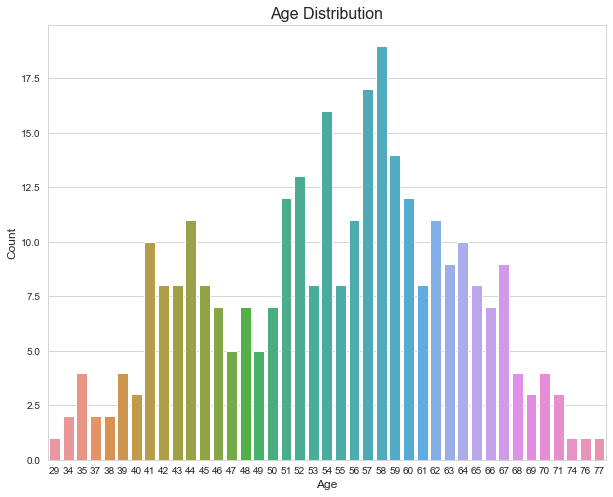

In [12]:
plt.figure(figsize=(10,8) )
sns.countplot(x='age',data= df)
plt.title('Age Distribution',fontsize=16)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()


### *Most of the patients are in the age group 50-60.

### *For better understanding and meaningful analysis we will divide the age into 3 different categories:

### 1.Young
### 2.Middle_Aged
### 3.Old_Aged

In [13]:
Min=df['age'].min()
Max=df['age'].max()
Mean_age=df['age'].mean()
print('Minimum Age:',Min)
print('Maximum Age:', Max)
print('Mean Age:',Mean_age)


Minimum Age: 29
Maximum Age: 77
Mean Age: 54.43894389438944


In [14]:
Young=df[(df['age']>=29) & (df['age']<40)]
print("young:",len(Young))
Middle_Aged=df[(df['age']>=40) & (df['age']<55)]
print('Middle_Aged:',len(Middle_Aged))
Elderly_Aged=df[(df['age']>=55)]
print("Elderly:",len(Elderly_Aged))

young: 15
Middle_Aged: 128
Elderly: 160


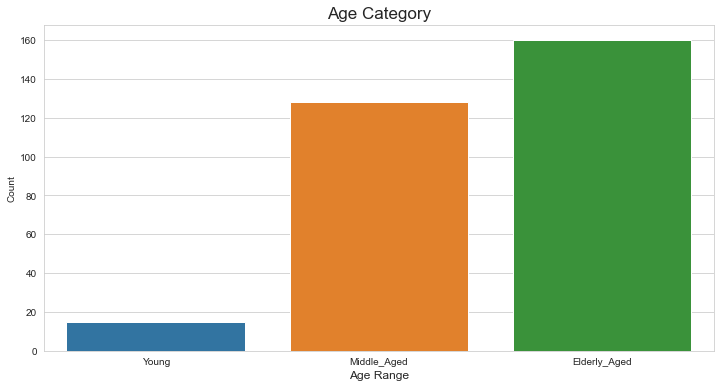

In [15]:
plt.figure(figsize=(12,6) )
sns.barplot(x=['Young','Middle_Aged','Elderly_Aged'],y=[len(Young),len(Middle_Aged),len(Elderly_Aged)])
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range',fontsize=12)
plt.ylabel('Count')
plt.show()

## Converting Numerical 'Age' Data into Categorical Data



In [16]:
def Age_range(a):
    if a>=29 and a<40:
        return('YOUNG')
    elif a>=40 and a<55:
        return ('MIDDLE_AGED')
    elif a>=55:
        return ('ELDERLY_AGED')
 


In [17]:
df['Age_range']= df['age'].apply(Age_range)

In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Age_range
0,63,Male,Typical_Angina,145,233,True,2,150,No,2.3,3,0,6,No_Disease,ELDERLY_AGED
1,67,Male,Asymtomatic,160,286,False,2,108,Yes,1.5,2,3,Reversible Defect,Disease,ELDERLY_AGED
2,67,Male,Asymtomatic,120,229,False,2,129,Yes,2.6,2,2,7,Disease,ELDERLY_AGED
3,37,Male,Non-Anginal Pain,130,250,False,0,187,No,3.5,3,0,Reversible Defect,No_Disease,YOUNG
4,41,Female,Atypical_Angina,130,204,False,2,172,No,1.4,1,0,Reversible Defect,No_Disease,MIDDLE_AGED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,Male,Typical_Angina,110,264,False,0,132,No,1.2,2,0,7,Disease,MIDDLE_AGED
299,68,Male,Asymtomatic,144,193,True,0,141,No,3.4,2,2,7,Disease,ELDERLY_AGED
300,57,Male,Asymtomatic,130,131,False,0,115,Yes,1.2,2,1,7,Disease,ELDERLY_AGED
301,57,Female,Atypical_Angina,130,236,False,2,174,No,0.0,2,1,Reversible Defect,Disease,ELDERLY_AGED


### Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn


<AxesSubplot:xlabel='num', ylabel='count'>

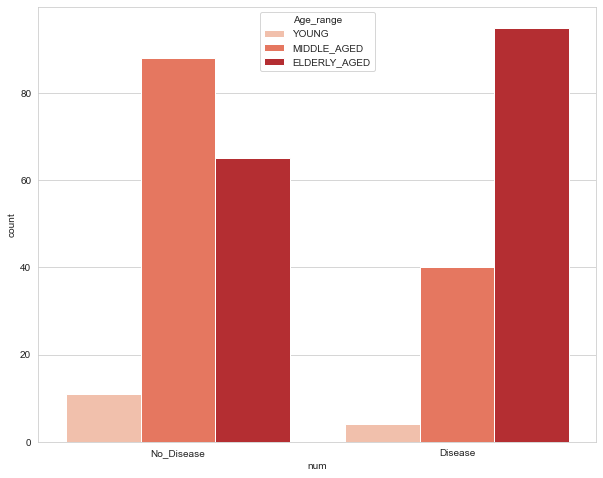

In [19]:
plt.figure(figsize=(10,8))
hue_order=['YOUNG','MIDDLE_AGED','ELDERLY_AGED']
sns.countplot(x='num',hue='Age_range',data=df, hue_order=hue_order,palette='Reds')

#### Middle Aged people are most affected by Heart Disease

### Bar Plot Creation of Gender Based Age Category using MatplotLib and Seaborn



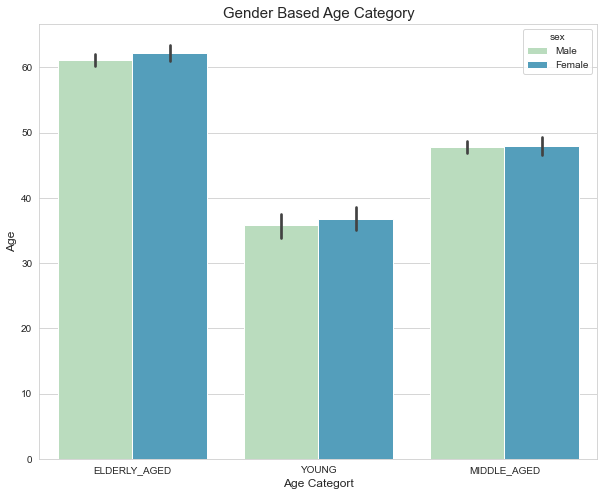

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x='Age_range',y='age',hue='sex',data=df, palette='GnBu')
plt.title('Gender Based Age Category',fontsize=15)
plt.xlabel('Age Categort',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.show()

#### In our dataset Males are more in Middle Age Category and Females are more in Elderly Age category


## Gender Distribution According to num Variable (dependent variable)


Text(0, 0.5, 'Count')

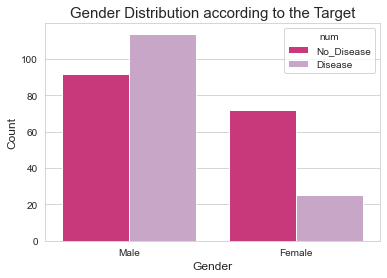

In [21]:
# CountPlot Creation of Gender Based Age Category using MatplotLib and Seaborn

sns.countplot(x='sex',hue='num',data=df,palette='PuRd_r')
plt.title('Gender Distribution according to the Target', fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Count',fontsize=12)

###### We can infer that among Male heart disease patients are higher than Female heart disease patients i.e. Males are more prone to heart diseases


## Chest Pain Distribution According to Target Variable


Text(0, 0.5, 'Count')

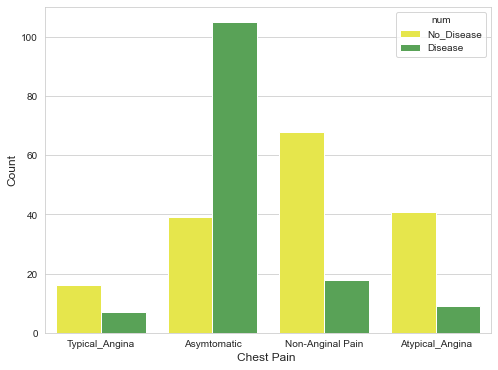

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='cp',hue='num',data=df,palette='Set1_r')
plt.xlabel('Chest Pain ',fontsize=12)
plt.ylabel('Count',fontsize=12)


#### we can infer that  majority of the heart disease patients are Asymtomatic 

### Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn


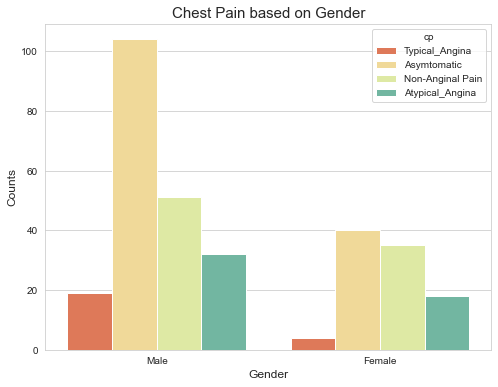

In [23]:

plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='cp',data=df,palette='Spectral')
plt.title('Chest Pain based on Gender',fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show()

#### we can infer that highest numbers of  patient are having asymtomatic condition followed by non-anginal chest pain  among both males and females.

### Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn :

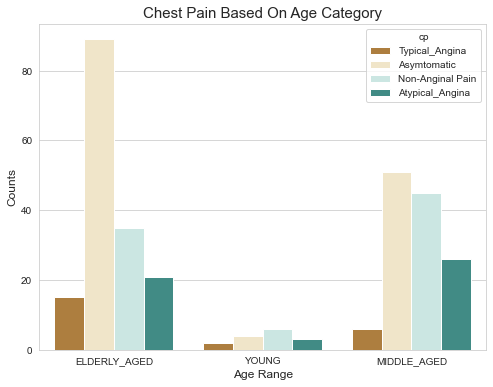

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='Age_range', hue='cp', data=df, palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=15)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

#### We can infer that elder are more prone to asymtomatic heart disease condition while in middle aged group both asymtomatic and  non-anginal chest pain condition is prevalent.

## Blood Pressure

### Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

<Figure size 576x432 with 0 Axes>

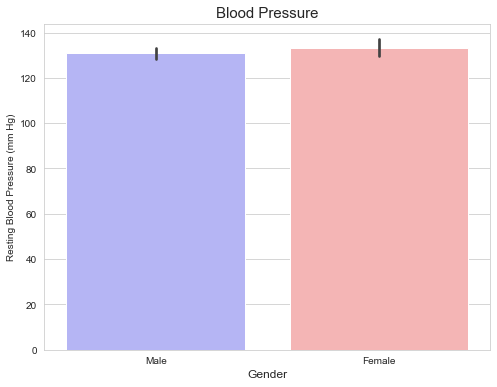

In [25]:

plt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))
sns.barplot(x='sex', y=('trestbps'), data=df, palette='bwr')
plt.title("Blood Pressure", fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel("Resting Blood Pressure (mm Hg)", fontsize=10)
plt.show()

#### Blood Pressure Levels are almost equal in both Males and Females

### #Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn


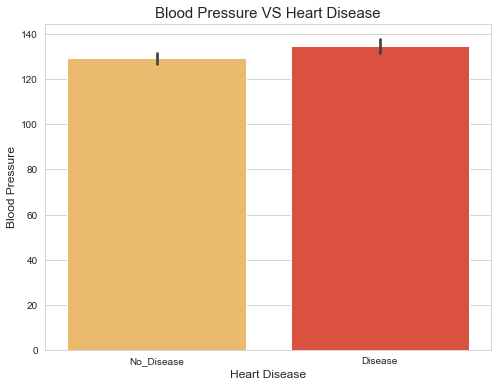

In [26]:


plt.figure(figsize=(8,6))
sns.barplot(x='num', y='trestbps', data=df, palette=("YlOrRd") )
plt.title('Blood Pressure VS Heart Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.show()

#### We can infer that blood pressure has no role in heart disease.

### Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

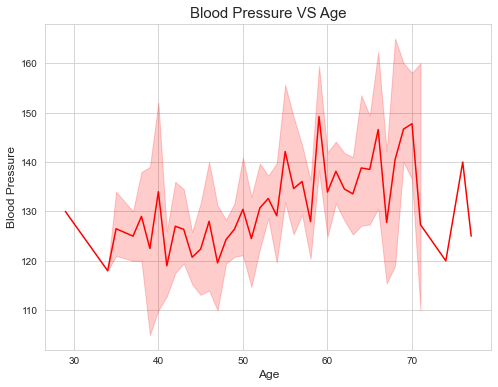

In [27]:
plt.figure(figsize=(8,6))
sns.lineplot(x='age', y='trestbps', data=df, color='r')
plt.title('Blood Pressure VS Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.show()

#### We can infer that Blood Pressure Levels increase between age group 50-60 and continues till 70

## Cholestrol

### Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

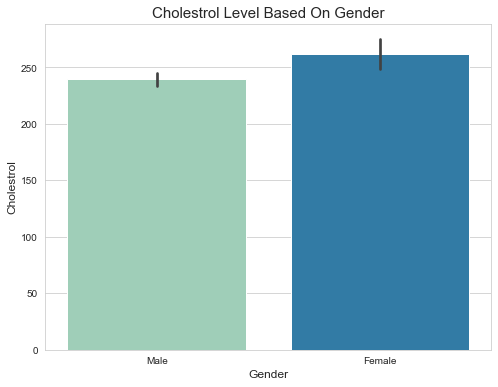

In [28]:

plt.figure(figsize=(8,6))
sns.barplot(x='sex', y='chol', data=df,palette='YlGnBu')
plt.title("Cholestrol Level Based On Gender", fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel("Cholestrol", fontsize=12)
plt.show()

#### Females have little bit of higher cholesterol than Males


### Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn


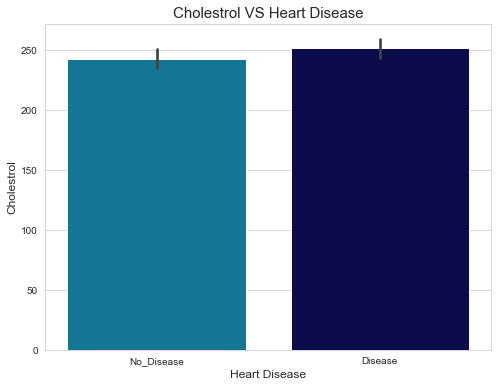

In [29]:

plt.figure(figsize=(8,6))
sns.barplot(x='num', y='chol', data=df, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Cholestrol', fontsize=12)
plt.show()


#### Higher Cholestrol Levels results chances of Heart Disease


### Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn


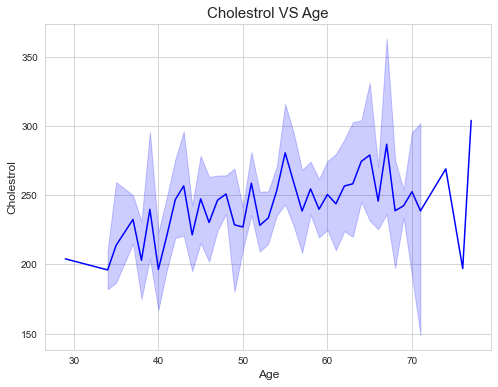

In [30]:

plt.figure(figsize=(8,6))
sns.lineplot(x='age', y='chol', data=df, color='b')
plt.title('Cholestrol VS Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholestrol', fontsize=12)
plt.show()

#### We can infer that Cholestrol Level increases with the age  and continues to increase till 65


## Fasting blood sugar distribution according to target variable


Text(0, 0.5, 'Count')

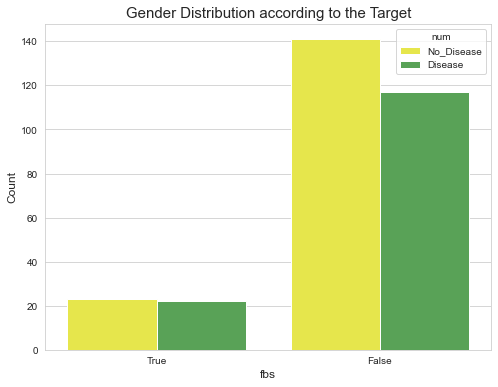

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='fbs',hue='num',data=df,palette='Set1_r')
plt.title('Gender Distribution according to the Target', fontsize=15)
plt.xlabel('fbs',fontsize=12)
plt.ylabel('Count',fontsize=12)

#### Fasting blood sugar or fbs is a diabetes indicator with fbs >120 mg/d is considered diabetic (True class)

#### we observe that the number for class true, is lower compared to class false

#### However,there are higher number of heart disease patient without diabetes.

#### hence fbs might not be a strong feature differentiating between heart disease an non-disease patient.



## PLOTTING HEATMAP FOR CORRELATION

<AxesSubplot:>

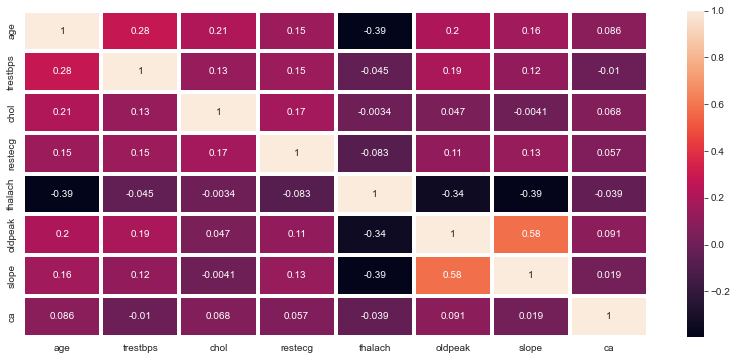

In [32]:

plt.figure(figsize=(14,6))

sns.heatmap(df.corr(), annot=True, linewidth=4)

In [33]:
df.to_csv('eda_done_healthvare analysis')